In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from bokeh.plotting import figure, output_notebook,show, ColumnDataSource
from bokeh.layouts import widgetbox
from bokeh.models.widgets import DataTable, NumberFormatter, TableColumn
output_notebook()

from k_fold import *
from proj1_helpers import *
from implementations import *
from helpers import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading BokehJS ...

# Cross-validation of the six baseline implementations

In [7]:
y, x, ids = load_csv_data('data/train.csv')
labels = np.array(np.genfromtxt('data/train.csv', delimiter=",", names=True).dtype.names[2:])

In [8]:
def cross_validation_visualization(lambds, mse_tr, mse_te, xlabel, ylabel, title):
    """visualization the curves of mse_tr and mse_te."""
    fig = plt.figure()
    plt.semilogx(lambds, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, mse_te, marker=".", color='r', label='test error')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(loc=2)
    plt.grid(True)
    fig.savefig(title, bbox_inches='tight')

# cross-validation for least squares with gradient descent

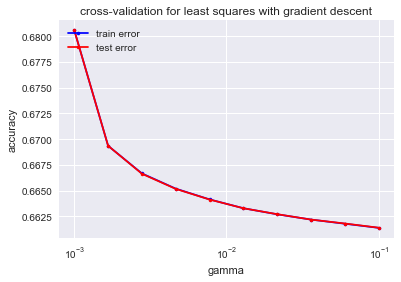

In [9]:
gammas = np.logspace(-3,-1.0,10)
mse_tr = []
mse_te = []
y_scaled = (y+1)/2.0
for gamma in gammas:
    mse_tr_, mse_te_ = cross_validation(y_scaled, x, 5, least_squares_GD, accuracy, {'initial_w' : np.zeros(x.shape[1] + 1), 'max_iters':500, 'gamma':gamma})
    mse_tr.append(mse_tr_)
    mse_te.append(mse_te_)
cross_validation_visualization(gammas, mse_tr, mse_te, "gamma", "inaccuracy", "cross-validation for least squares with gradient descent")

# cross-validation for least squares with stochastic gradient descent

/Users/Hakim/Documents/ML_project/scripts/helpers.py:66: RuntimeWarning: invalid value encountered in less_equal
  res[res <= 0] = -1
/Users/Hakim/Documents/ML_project/scripts/helpers.py:67: RuntimeWarning: invalid value encountered in greater
  res[res > 0]  = 1
/Users/Hakim/Documents/ML_project/scripts/implementations.py:29: RuntimeWarning: invalid value encountered in subtract
  w = w - gamma * gradient


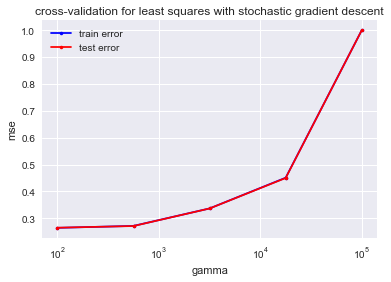

In [10]:
gammas = np.logspace(2,5,5)
mse_tr = []
mse_te = []
for gamma in gammas:
    mse_tr_, mse_te_ = cross_validation(y, x, 10, least_squares_SGD, accuracy, {'initial_w' : np.zeros(x.shape[1]  + 1), 'max_iters':10000, 'gamma':gamma})
    mse_tr.append(mse_tr_)
    mse_te.append(mse_te_)
cross_validation_visualization(gammas, mse_tr, mse_te, "gamma", "inaccuracy", "cross-validation for least squares with stochastic gradient descent")

# cross-validation for least squares with normal equation

In [11]:
rmse_tr_, rmse_te_ = cross_validation(y, x, 5, least_squares, accuracy, seed=5)
print(rmse_tr_, rmse_te_)

0.255083 0.255132


# cross-validation for ridge regression

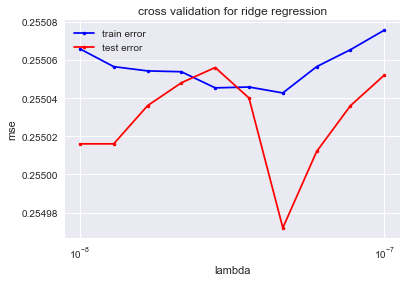

In [12]:
lambdas = np.logspace(-8,-7,10)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y, x, 10, ridge_regression, accuracy, {'lambda_': lambda_}, seed=5)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te, "lambda", "inaccuracy", "cross validation for ridge regression")

# cross-validation for logistic regression

/Users/Hakim/Documents/ML_project/scripts/helpers.py:35: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(y.T @ np.log(sigma_xn_w) + (1-y).T @ np.log(1-sigma_xn_w))


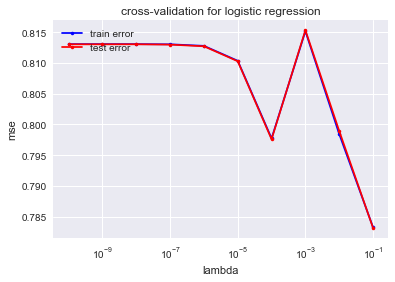

In [15]:
lambdas = np.logspace(-10,-1,10)
rmse_tr = []
rmse_te = []
y_scaled = (y+1)/2.0
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y_scaled, x, 5, logistic_regression, accuracy, {'initial_w': np.zeros(x.shape[1] + 1), 'max_iters': 10000, 'gamma': lambda_})
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te, "lambda", "inaccuracy", "cross-validation for logistic regression")

# cross-validation for regularized logistic regression

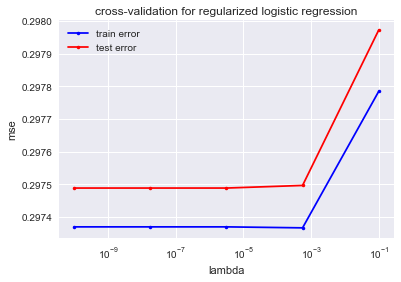

In [17]:
lambdas = np.logspace(-10,-1,5)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y, x, 5, reg_logistic_regression, accuracy, {'lambda_': lambda_,'initial_w': np.zeros(x.shape[1]+1), 'max_iters': 10000, 'gamma': 0.001})
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)

cross_validation_visualization(lambdas, rmse_tr, rmse_te, "lambda", "inaccuracy", "cross-validation for regularized logistic regression")

# Customized model

Our model divides the training dataset in six groups based on the observation made during the exploratory data analysis. Our model makes use of Ridge Regression.

Function to divide the training dataset in six groups.

In [18]:
def x_y_for_jet(x, y, n, mass=True):
    jet_num = x[:, 22] == n
    if n == 2:
        jet_num = jet_num | (x[:, 22] == 3)
    if mass:
        jet_num = jet_num & (x[:, 0] != -999)
    else:
        jet_num = jet_num & (x[:, 0] == -999)
    x_jet = x[jet_num]
    y_jet = y[jet_num]
    jet_mean = np.mean(x_jet, axis=0)
    x_jet = x_jet[:, (jet_mean != -999) & (jet_mean != 0) & (jet_mean != n)]
    return x_jet, y_jet

# tuning the model: group0

In [ ]:
lambdas = np.logspace(-10,0,30)
x_jet, y_jet = x_y_for_jet(x,y, 0, False)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y_jet, x_jet, 10, ridge_regression, accuracy, {'lambda_': lambda_}, seed=5)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

In [ ]:
lambdas = np.logspace(-10,0,10)
x_jet, y_jet = x_y_for_jet(x,y, 0, False)
rmse_tr = []
rmse_te = []
degree = 5
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y_jet, x_jet, 10, ridge_regression_with_poly, accuracy_with_poly, {'lambda_': lambda_, 'degree': degree}, {'degree': degree},  seed=5)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

In [ ]:
print(np.min(rmse_te))
print(lambdas[np.argmin(rmse_te)])

# tuning the model: group1

In [ ]:
lambdas = np.logspace(-10,0,30)
x_jet, y_jet = x_y_for_jet(x,y, 0, True)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y_jet, x_jet, 10, ridge_regression, accuracy, {'lambda_': lambda_}, seed=5)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

In [ ]:
lambdas = np.logspace(-10,0,5)
x_jet, y_jet = x_y_for_jet(x,y, 0, True)
rmse_tr = []
rmse_te = []
degree = 4
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y_jet, x_jet, 10, ridge_regression_with_poly, accuracy_with_poly, {'lambda_': lambda_, 'degree': degree}, {'degree': degree},  seed=5)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

In [ ]:
print(np.min(rmse_te))
print(lambdas[np.argmin(rmse_te)])

# tuning the model: group2

In [ ]:
lambdas = np.logspace(-10,0,30)
x_jet, y_jet = x_y_for_jet(x,y, 1, True)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y_jet, x_jet, 10, ridge_regression, accuracy, {'lambda_': lambda_}, seed=5)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

In [ ]:
lambdas = np.logspace(-10,0,10)
x_jet, y_jet = x_y_for_jet(x,y, 1, True)
rmse_tr = []
rmse_te = []
degree = 6
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y_jet, x_jet, 10, ridge_regression_with_poly, accuracy_with_poly, {'lambda_': lambda_, 'degree': degree}, {'degree': degree},  seed=5)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

In [ ]:
print(np.min(rmse_te))
print(lambdas[np.argmin(rmse_te)])

# tuning the model: group3

In [ ]:
lambdas = np.logspace(-10,0,30)
x_jet, y_jet = x_y_for_jet(x,y, 1, False)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y_jet, x_jet, 10, ridge_regression, accuracy, {'lambda_': lambda_}, seed=5)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

In [ ]:
lambdas = np.logspace(-10,0,10)
x_jet, y_jet = x_y_for_jet(x,y, 1, False)
rmse_tr = []
rmse_te = []
degree = 5
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y_jet, x_jet, 10, ridge_regression_with_poly, accuracy_with_poly, {'lambda_': lambda_, 'degree': degree}, {'degree': degree},  seed=5)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

In [ ]:
print(np.min(rmse_te))
print(lambdas[np.argmin(rmse_te)])

# tuning the model: group4

In [ ]:
lambdas = np.logspace(-10,0,30)
x_jet, y_jet = x_y_for_jet(x,y, 2, True)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y_jet, x_jet, 10, ridge_regression, accuracy, {'lambda_': lambda_}, seed=5)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

In [ ]:
lambdas = np.logspace(-10,0,10)
x_jet, y_jet = x_y_for_jet(x,y, 2, True)
rmse_tr = []
rmse_te = []
degree = 7
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y_jet, x_jet, 10, ridge_regression_with_poly, accuracy_with_poly, {'lambda_': lambda_, 'degree': degree}, {'degree': degree},  seed=5)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

In [ ]:
print(np.min(rmse_te))
print(lambdas[np.argmin(rmse_te)])

# tuning the model: group5

In [ ]:
lambdas = np.logspace(-10,0,30)
x_jet, y_jet = x_y_for_jet(x,y, 2, False)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y_jet, x_jet, 10, ridge_regression, accuracy, {'lambda_': lambda_}, seed=5)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

In [ ]:
lambdas = np.logspace(-10,0,10)
x_jet, y_jet = x_y_for_jet(x,y, 2, False)
rmse_tr = []
rmse_te = []
degree = 3
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y_jet, x_jet, 10, ridge_regression_with_poly, accuracy_with_poly, {'lambda_': lambda_, 'degree': degree}, {'degree': degree},  seed=5)
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

In [ ]:
print(np.min(rmse_te))
print(lambdas[np.argmin(rmse_te)])

# tuning the whole model

In [ ]:
lambdas = np.logspace(-5,0,10)
degree = 6
for n in range(3):
    for mass in [True, False]:
        x_jet, y_jet = x_y_for_jet(x, y, n, mass)
        plt.figure(n*2+int(mass))
        rmse_tr = []
        rmse_te = []
        for lambda_ in lambdas:
            rmse_tr_, rmse_te_ = cross_validation(y_jet, x_jet, 10, ridge_regression, compute_mse, {'lambda_': lambda_}, seed=5)
            rmse_tr.append(rmse_tr_)
            rmse_te.append(rmse_te_)
        cross_validation_visualization(lambdas, rmse_tr, rmse_te)
        plt.plot()
        i += 1